<a href="https://colab.research.google.com/github/AarohSinha100/MACHINE_LEARNING/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION

Logistic Regression estimates the relationship between the dependent variable and the independent variable and predicts an categorical values based on the data, for example "yes" or "no", "True" or "False".
* ***The dependent variable in logistic regression is binary (coded as 1 or 0).***

Logistic Regression can be expressed as :-

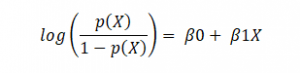


***LOGISTIC REGRESSION USES THE SIGMOID FUNCTION***

### **SIGMOID FUNCTION** -
Sigmoid is a mathematical function that takes any real number and maps it to a probability between 1 and 0.

* The sigmoid function forms an S shaped graph, which means as x approaches infinity, the probability becomes 1, and as
x
 approaches negative infinity, the probability becomes 0. The model sets a threshold that decides what range of probability is mapped to which binary variable.

 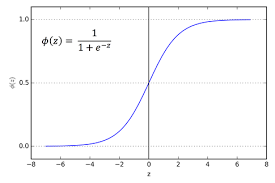

### **Decision Boundary – Logistic Regression**
A threshold can be established to forecast which class a data belongs to. The derived estimated probability is categorized into classes based on this threshold.

If the predicted value is less than 0.5, categorize the particular student as a pass; otherwise, label it as a fail. There are two types of decision boundaries: linear and non-linear. To provide a complicated decision boundary, the polynomial order can be raised.

In [1]:
import datetime
print(f"This notebook was last run on {datetime.datetime.now()}")

This notebook was last run on 2023-08-09 10:25:02.555495


In [2]:
# Getting in the dataset
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [3]:
import pandas as pd
import io

titanic_df = pd.read_csv(io.BytesIO(uploaded["Titanic-Dataset.csv"]))
titanic_copy = titanic_df.copy() # Making a copy (a good practice)
titanic_df.copy()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.shape

(891, 12)

We have 891 examples and 11 independent variables and 1 dependent variables

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`NOTE -` ***Cabing has a lots of null values and also it is not that important feature, we will simple drop the cabin column***

In [7]:
titanic_df.drop("Cabin",axis=1, inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


`NOTE` - ***The age also has over 100 null values, but this is not very big number to make us drop the whole column, and also age is a very important factor. We can drop the null value rows, tho it will result in loss od some data. I have somehting diffrent in mind, let's change the Nan as the mean of the entire column***

In [8]:
import random

sum_age = 0
for i in range(0, len(titanic_df)):
  if not pd.isnull(titanic_df["Age"][i]):
    sum_age+= int(titanic_df["Age"][i])
print(sum_age)

mean_age = int(sum_age / len(titanic_df))
mean_age

for i in range(0, len(titanic_df)):
  if pd.isnull(titanic_df["Age"][i]):
    titanic_df["Age"][i] = int(random.randint(16,23+1))
  else:
    continue

21191


<ipython-input-8-eb8d9a5507d3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df["Age"][i] = int(random.randint(16,23+1))


In [9]:
titanic_df["Age"].isnull().sum()

0

In [10]:
# m = int(sum([int(titanic_df["Age"][i]) for i in range(len(titanic_df)) if not pd.isnull(titanic_df["Age"][i])]) / len(titanic_df))
# m

## DATA WRANGLING

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
titanic_df["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

***Note --> Name and Ticket are not so important for us right now so we can drop it***

In [13]:
titanic_df.drop(["Name","Ticket"],axis=1, inplace=True)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


### **Let's one hot encode the object data for visualization**

* NOTE - we are creating the copy of df at this stage, so as to make some temporary changes in it
* We are going to use those copied df with changes for visualization
* Later we are gonna use pipeline so...

In [14]:
df = titanic_df.copy()
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [15]:
gender = pd.DataFrame(pd.get_dummies(df["Sex"]))
gender.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [16]:
print(gender.shape, gender.isnull().sum())

(891, 2) female    0
male      0
dtype: int64


In [17]:
df = pd.concat([df, gender], axis=1)
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0


In [18]:
def gender(value):
  return 0 if value=="male" else 1

df["Sex"] = df["Sex"].apply(lambda x: gender(x))
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,0,22.0,1,0,7.2500,S,0,1
1,2,1,1,1,38.0,1,0,71.2833,C,1,0


<Axes: xlabel='Sex', ylabel='count'>

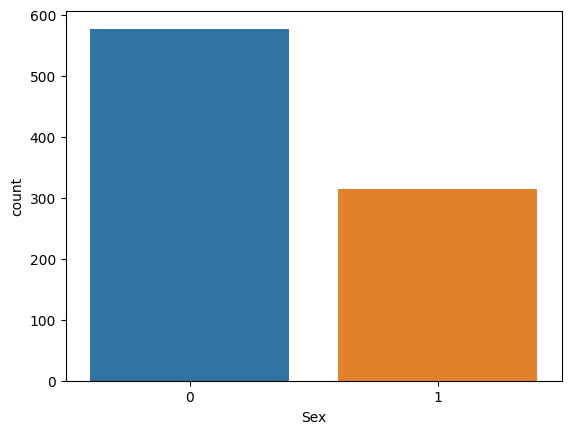

In [19]:
import seaborn as sns
sns.countplot(x="Sex", data=df)

* ***It looks like mode male (0) were present on the board***

<Axes: xlabel='Sex', ylabel='count'>

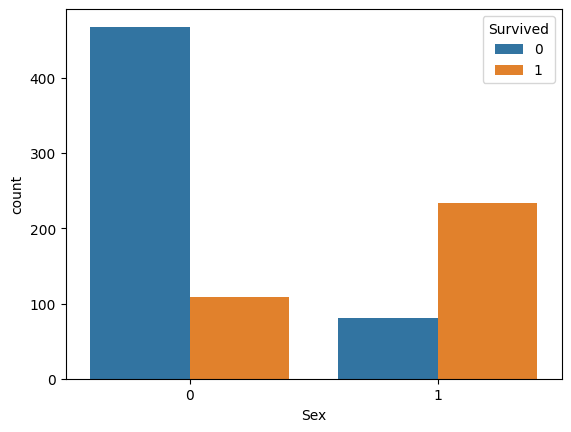

In [20]:
sns.countplot(x="Sex", data=df, hue="Survived")

* ***More number of male died (tho they were greater in number also)***

In [21]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
embarked = pd.DataFrame(pd.get_dummies(df["Embarked"]))
df = pd.concat([df, embarked], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,S,1,0,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,S,1,0,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,S,0,1,0,0,1


In [23]:
def embarked(value):
  return 0 if value=="C" else 1 if value=="Q" else "S"

df["Embarked"] = df["Embarked"].apply(lambda x: embarked(x))
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,S,1,0,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,S,1,0,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,S,0,1,0,0,1


#### DATA VISUALIZATION

<Axes: xlabel='Survived', ylabel='count'>

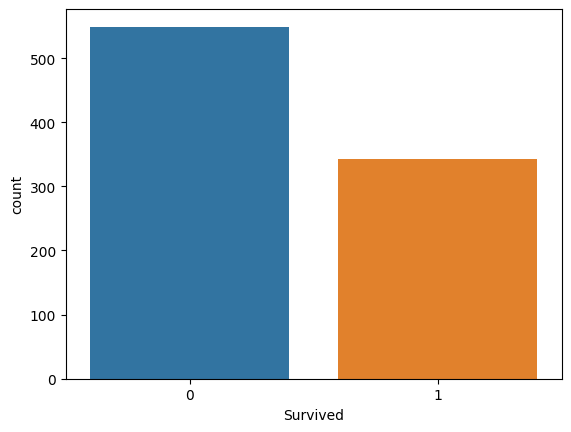

In [24]:
sns.countplot(x="Survived",data= df)

* `0` -> No
* `1` -> Yes

* ***MORE PEOPLE SURVIVED THAN PERISHED***

In [25]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: ylabel='Frequency'>

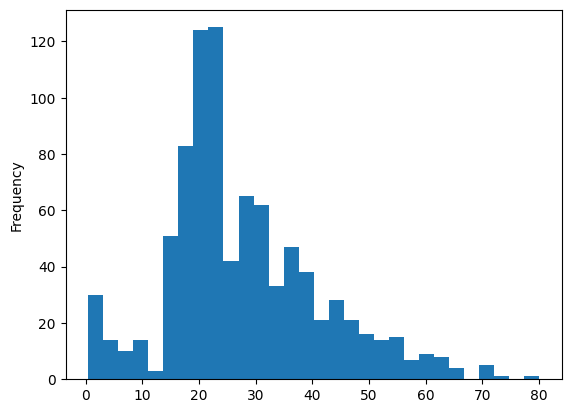

In [26]:
df["Age"].plot(kind="hist", bins=30)

* ***MAJORITY OF THEM WERE YOUNG PEOPLE AGE 20-13***

#### **CHALLENGE!!!**
* **Create classes of age and analyse the suvival of diffrent age groups**

In [27]:
chall_df = pd.DataFrame(df[["Age", "Survived"]])
chall_df.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [28]:
age_gaps = [(i,i+9) for i in range(1,101,10)]
for start,end in age_gaps:
  col_name = f"{start}-{end}"
  chall_df[col_name] = 0

chall_df.head()

,Age,Survived,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
0,22.0,0,0,0,0,0,0,0,0,0,0,0
1,38.0,1,0,0,0,0,0,0,0,0,0,0
2,26.0,1,0,0,0,0,0,0,0,0,0,0
3,35.0,1,0,0,0,0,0,0,0,0,0,0
4,35.0,0,0,0,0,0,0,0,0,0,0,0


# **CREATING A PIPELINE**

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Creating the train_Test_splits
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

columns_to_encode = ["Sex", "Embarked"]
columns_to_standardize = ["Fare"]

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('std_scaler', StandardScaler(), columns_to_standardize),
            ('encoder', OneHotEncoder(), columns_to_encode)
        ],
        remainder="passthrough"
    )),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std_scaler',
                                                  StandardScaler(), ['Fare']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [35]:
y_preds = pipeline.predict(X_test)
print(f"ACCURACY SCORE - {accuracy_score(y_test, y_preds)}")

ACCURACY SCORE - 0.7932960893854749


## EXPERIMENT
Let's run pipeline on the age gap containing dataset

In [37]:
chall_df

,Age,Survived,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
0,22.0,0,0,0,0,0,0,0,0,0,0,0
1,38.0,1,0,0,0,0,0,0,0,0,0,0
2,26.0,1,0,0,0,0,0,0,0,0,0,0
3,35.0,1,0,0,0,0,0,0,0,0,0,0
4,35.0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,0,0,0,0,0,0,0,0,0
887,19.0,1,0,0,0,0,0,0,0,0,0,0
888,20.0,0,0,0,0,0,0,0,0,0,0,0
889,26.0,1,0,0,0,0,0,0,0,0,0,0


In [39]:
type(titanic_df), type(chall_df)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [40]:
titanic_df2 = pd.concat([titanic_df, chall_df[chall_df.columns[2:]]], axis=1)
titanic_df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,0,0,0,0,0,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,0,0,0,0,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,0,0,0,0,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,0,0,0,0,0,0,0,0


In [41]:
titanic_df2.drop("Age", axis=1, inplace=True)

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Creating the train_Test_splits
X = titanic_df2.drop("Survived", axis=1)
y = titanic_df2["Survived"]

columns_to_encode = ["Sex", "Embarked"]
columns_to_standardize = ["Fare"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pipeline2 = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), columns_to_standardize),
            ('encoder', OneHotEncoder(), columns_to_encode)
        ],
        remainder="passthrough"
    )),
    ('classifier', LogisticRegression())
])

pipeline2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Fare']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [45]:
y_preds = pipeline2.predict(X_test)
print(f"ACCURACY SCORE - {accuracy_score(y_test, y_preds)}")

ACCURACY SCORE - 0.8044692737430168
